In [18]:
import trueskillthroughtime as ttt
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use("dark_background") 

In [19]:


df = pd.read_csv('games.csv')

df['handicap'].mean()
df

,id,created,modified,handicap,komi,result,reason,points,date,black_player_id,...,event_id,description,unrated,id.1,created.1,modified.1,name,start_date,end_date,description.1
0,6791,2023-07-05 02:57:16,2023-07-05 02:57:16,0,6.5,black,unknown,0.0,2023-01-15,142,...,122,NaN,0,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
1,6790,2023-07-05 02:57:16,2023-07-05 02:57:16,0,6.5,black,unknown,0.0,2023-01-15,173,...,122,NaN,0,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
2,6789,2023-07-05 02:57:16,2023-07-05 02:57:16,0,6.5,black,unknown,0.0,2023-01-15,208,...,122,NaN,0,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
3,6788,2023-07-05 02:57:16,2023-07-05 02:57:16,0,6.5,white,unknown,0.0,2023-01-15,45,...,122,NaN,0,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
4,6787,2023-07-05 02:57:16,2023-07-05 02:57:16,0,6.5,white,unknown,0.0,2023-01-14,142,...,122,NaN,0,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,5,2016-06-29 18:17:28,2016-09-23 13:52:20,0,6.5,white,points,5.5,2012-06-30,5,...,4,NaN,0,4,2016-06-29 18:13:09,2016-09-23 13:52:20,GranTorneoDeTest2,2012-06-30,2012-06-30,En esta revancha el jugador malo pierde contra...
6487,4,2016-06-29 18:13:09,2016-09-23 13:52:20,0,6.5,black,points,10.5,2012-06-30,4,...,4,NaN,0,4,2016-06-29 18:13:09,2016-09-23 13:52:20,GranTorneoDeTest2,2012-06-30,2012-06-30,En esta revancha el jugador malo pierde contra...
6488,3,2016-06-29 17:40:55,2016-09-23 13:52:02,0,6.5,white,resignation,0.0,2012-06-29,3,...,3,NaN,0,3,2016-06-29 17:34:00,2016-09-23 13:52:02,GranTorneoDeTest1,2012-06-29,2012-06-29,El mejor torneo del mundo. Sirve para probar q...
6489,2,2016-06-28 14:44:44,2016-09-23 13:51:37,0,6.5,white,points,2.5,2012-06-28,2,...,2,NaN,0,2,2016-06-28 14:43:24,2016-09-23 13:51:37,TorneoJamón,2012-06-28,2012-06-28,NaN


In [20]:

df['winner_id'] = df.apply(lambda row : str(row['black_player_id']) if row['result'] == 'black' else str(row['white_player_id']), axis = 1)
df['looser_id'] = df.apply(lambda row : str(row['white_player_id']) if row['result'] == 'black' else str(row['black_player_id']), axis = 1)
df['winner_handicap'] =  df.apply(lambda row : 'handi_' + str(row['handicap']) if row['result'] == 'black' else 'handi_0', axis = 1)
df['looser_handicap'] = df.apply(lambda row : 'handi_0' if row['result'] == 'black' else 'handi_' + str(row['handicap']), axis = 1)


def winner_team(row):
    if row['result'] == 'black':
        return [str(row['black_player_id']) , 'handi_1', 'handi_0']
    else:
        return [str(row['white_player_id']) ]
        
def looser_team(row):
    if row['result'] == 'white':
        return [str(row['black_player_id']) , 'handi_1', 'handi_0']
    else:
        return [str(row['white_player_id']) ] 

def winner_team_weights(row):
    if row['result'] == 'black':
        return [1.0, float(row.handicap), 1.0]
    else:
        return [1.0]
        
def looser_team_weights(row):
    if row['result'] == 'white':
        return [1.0, float(row.handicap), 1.0]
    else:
        return [1.0] 


df['winner_team'] = df.apply(winner_team, axis = 1)
df['looser_team'] = df.apply(looser_team, axis = 1)
df['winner_team_weights'] = df.apply(winner_team_weights, axis = 1)
df['looser_team_weights'] = df.apply(looser_team_weights, axis = 1)


players_ids = set(df['winner_id']).union(set(df['looser_id']))
handi_ids= set(['handi_0'] +[ 'handi_' + str(i) for i in range(2,10)] )

# handi_ids
# df['start_date']
df[['handicap', 'result', 'winner_handicap', 'winner_team']]
# df.dtypes


,handicap,result,winner_handicap,winner_team
0,0,black,handi_0,"[142, handi_1, handi_0]"
1,0,black,handi_0,"[173, handi_1, handi_0]"
2,0,black,handi_0,"[208, handi_1, handi_0]"
3,0,white,handi_0,[7]
4,0,white,handi_0,[96]
...,...,...,...,...
6486,0,white,handi_0,[3]
6487,0,black,handi_0,"[4, handi_1, handi_0]"
6488,0,white,handi_0,[4]
6489,0,white,handi_0,[1]


In [21]:
columns = zip(df.winner_team, df.looser_team)
composition = [ [w,l] for w, l in columns ]

weights = [ [ww, lw] for ww, lw in zip(df.winner_team_weights, df.looser_team_weights)]
times = [ datetime.strptime(t, "%Y-%m-%d").timestamp()/(60*60*24) for t in df.end_date]




priors_handi = {'handi_1': ttt.Player(ttt.Gaussian(0, 6), beta=0,gamma=0),
                'handi_0': ttt.Player(ttt.Gaussian(0, 6), beta=0,gamma=0)
               }

display(priors_handi)

h = ttt.History(composition = composition, times = times, priors= priors_handi, sigma=1.13, gamma=0.025, weights= weights)
h.convergence(epsilon=0.01, iterations=16) # 16

{'handi_1': Player(Gaussian(mu=0.000, sigma=6.000), beta=0.000, gamma=0.000),
 'handi_0': Player(Gaussian(mu=0.000, sigma=6.000), beta=0.000, gamma=0.000)}

Iteration =  0 , step =  (5.260840071320346, 5.900816961183743)
Iteration =  1 , step =  (0.3721661307083415, 0.022213640027428205)
Iteration =  2 , step =  (0.2259351700848784, 0.008917221935163866)
Iteration =  3 , step =  (0.16237712389494074, 0.006725709421639081)
Iteration =  4 , step =  (0.12384734994174007, 0.005224469913813756)
Iteration =  5 , step =  (0.09947769992183453, 0.004164939378016985)
Iteration =  6 , step =  (0.08134670567216151, 0.0034136076516519953)
Iteration =  7 , step =  (0.06741348989108431, 0.0028292756612061654)
Iteration =  8 , step =  (0.05639969766285624, 0.0023655667274766756)
Iteration =  9 , step =  (0.04749849862313127, 0.0019910079933862512)
Iteration =  10 , step =  (0.04018482389983635, 0.0016839603772144107)
Iteration =  11 , step =  (0.03435305690855195, 0.0014292823309515201)
Iteration =  12 , step =  (0.02937315930998885, 0.0012161324073112212)
Iteration =  13 , step =  (0.025112398621467413, 0.0010365419946645194)
Iteration =  14 , step =  (0

((0.018347622660094043, 0.0007553170164947831), 16)

In [22]:

agents = df.winner_id.sample(n=5).to_list() #+ 

# agents = [ 'handi_' + str(i) for i in range(0,2)]

# agents = handi_ids



61 17239.125 -0.14067317468538115 0.4564261474415383
12 17006.125 2.0222278133418783 0.6398891159914828
186 17867.125 0.7172170672771081 0.5879437153605023
238 18658.125 0.7013987810632115 0.2832094530916687
53 17121.125 1.5667444813914055 0.40714409989895955


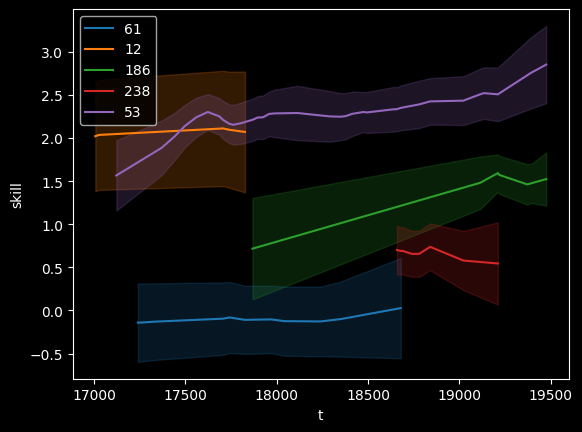

In [23]:


lc = h.learning_curves()
pp = plt.figure(); plt.xlabel("t"); plt.ylabel("skill")
cmap = plt.get_cmap("tab10")
for i, agent in enumerate(agents):
    t = [v[0] for v in lc[agent]]
    mu = [v[1].mu for v in lc[agent]]
    sigma = [v[1].sigma for v in lc[agent]]
    print(agent, t[0], mu[0], sigma[0])
    plt.plot(t, mu, color= cmap(i), label=agent)
    plt.fill_between(t, [m+s for m,s in zip(mu, sigma)], [m-s for m,s in zip(mu, sigma)], alpha=0.2, color = cmap(i))

plt.legend()
plt.show()




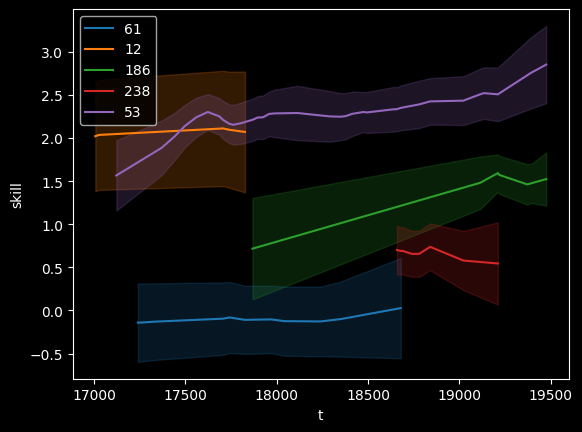

In [24]:


lc = h.learning_curves()
pp = plt.figure(); plt.xlabel("t"); plt.ylabel("skill")
cmap = plt.get_cmap("tab10")
for i, agent in enumerate(agents):
    t = [v[0] for v in lc[agent]]
    mu = [v[1].mu for v in lc[agent]]
    sigma = [v[1].sigma for v in lc[agent]]
    plt.plot(t, mu, color= cmap(i), label=agent)
    plt.fill_between(t, [m+s for m,s in zip(mu, sigma)], [m-s for m,s in zip(mu, sigma)], alpha=0.2, color = cmap(i))

plt.legend()
plt.show()

In [25]:
h.learning_curves()['7'
][-1]



(19505.125, N(mu=2.830, sigma=0.410))

In [26]:
ratings = pd.read_csv('ratings.csv')

ratings

,id,mu,sigma,event_id,player_id,id.1,created,modified,name,start_date,end_date,description
0,167803,-13.50000,2.191440,1,1,1,2016-06-26 19:50:00,2016-09-23 13:51:15,TorneoLechuga,2012-06-26,2012-06-26,NaN
1,167804,4.50000,1.059470,1,2,1,2016-06-26 19:50:00,2016-09-23 13:51:15,TorneoLechuga,2012-06-26,2012-06-26,NaN
2,167805,-2.29463,1.007400,2,1,2,2016-06-28 14:43:24,2016-09-23 13:51:37,TorneoJamón,2012-06-28,2012-06-28,NaN
3,167806,1.87996,0.771821,2,2,2,2016-06-28 14:43:24,2016-09-23 13:51:37,TorneoJamón,2012-06-28,2012-06-28,NaN
4,167807,-4.49938,1.449990,3,3,3,2016-06-29 17:34:00,2016-09-23 13:52:02,GranTorneoDeTest1,2012-06-29,2012-06-29,El mejor torneo del mundo. Sirve para probar q...
...,...,...,...,...,...,...,...,...,...,...,...,...
2467,170167,-4.48870,0.267399,122,142,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
2468,170168,-2.75379,0.354133,122,172,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
2469,170169,-2.58418,0.383360,122,173,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN
2470,170170,-5.43794,0.244292,122,186,122,2023-07-05 02:57:16,2023-07-05 02:57:16,Clasificatorio Equipo Argentino 7.ª Liga Panda...,2023-01-14,2023-01-15,NaN


,id,mu,sigma,event_id,player_id,id.1
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,169038.500000,-7.106654,0.530121,64.036812,95.488673,64.036812
std,713.749256,7.291996,0.433453,32.312064,83.432968,32.312064
min,167803.000000,-32.759000,0.114843,1.000000,1.000000,1.000000
25%,168420.750000,-11.626725,0.272285,39.000000,23.000000,39.000000
50%,169038.500000,-5.573875,0.389010,63.000000,71.000000,63.000000
75%,169656.250000,-2.717270,0.620868,92.000000,143.000000,92.000000
max,170274.000000,8.628710,3.784020,122.000000,324.000000,122.000000


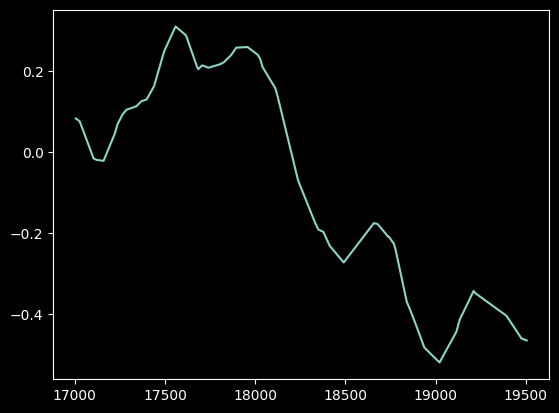

In [27]:
agent_id = str(18)

t = [v[0] for v in lc[agent_id]]
mu = [v[1].mu for v in lc[agent_id]]
plt.plot(t, mu ,label=agent_id)



times = [ datetime.strptime(t, "%Y-%m-%d").timestamp()/(60*60*24) for t in ratings.start_date]
ratings_mu = ratings.mu

ratings.describe()


In [28]:
import math

print(h.log_evidence())
math.exp(h.log_evidence()/h.size)

-3441.364398711689


0.5885021112010274